In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
data = pd.read_csv("./500_Person_Gender_Height_Weight_Index.csv")
data.sample(3)

,Gender,Height,Weight,Index
241,Male,166,61,2
248,Female,188,90,3
311,Female,180,156,5


In [25]:
data.drop("Index", inplace=True, axis=1)
data

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
...,...,...,...
495,Female,150,153
496,Female,184,121
497,Female,141,136
498,Male,150,95


In [26]:
data.shape

(500, 3)

In [27]:
data.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [28]:
data["Height"].min()

140

In [29]:
def get_median(series):
    median = None
    ordered = series.sort_values()
    size = len(series)
    if size % 2 == 0:
        median = (ordered[size/2 - 1] + ordered[size/2])/2
    else:
        median =  ordered[size/2]
    return median

med =  get_median(data["Weight"])
med

79.5

In [30]:
data["Weight"].median()

106.0

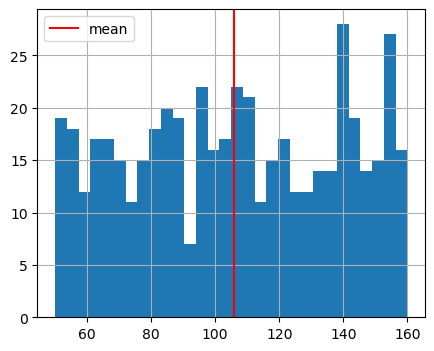

In [37]:
plt.figure(figsize=(5,4))
data["Weight"].hist(bins=30)
plt.axvline(data["Weight"].mean(), color='r', label="mean")
plt.legend()

In [40]:
h = data["Height"].copy()
h = data.groupby("Height", as_index=False).count()
h

,Height,Gender,Weight
0,140,8,8
1,141,8,8
2,142,9,9
3,143,3,3
4,144,5,5
5,145,9,9
6,146,9,9
7,147,7,7
8,148,5,5
9,149,5,5
